# **Анализ рынка компьютерных игр для магазина "X"**

# Предобработка данных

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/Users/onelev/shkoding/jupyter_projects/sbor1/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
# просмотрим данные
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# просмотрим названия колонок
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
# переименуем названия столбцов
data.columns = ['name',
                'platform',
                'year_of_release',
                'genre',
                'america_sales',
                'eu_sales',
                'japan_sales',
                'other_sales',
                'critic_score',
                'user_score',
                'rating']

In [6]:
# проверим на дубликаты
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   america_sales    16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   japan_sales      16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
# проверим пропуски
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
america_sales         0
eu_sales              0
japan_sales           0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

пропуски в оценках и рейтинге оставлю, не стану заменять медианами или нулевыми значениями, поскольку, возможно, отсутствие оценок может потом нам на что-то указать.

In [9]:
# заменим пропуски оценок критиков на 'NaN'
data['critic_score'] = data['critic_score'].fillna(np.NaN)
                        
# заменим пропуски оценок пользователей как пропуски
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].fillna(np.NaN)
# заменим пропуски в возрастном рейтинге на 'NaN'
data['rating'] = data['rating'].fillna('NaN')

In [10]:
# изменим тип данных
data['user_score'] = data['user_score'].astype('float')

In [11]:
# посчитаем суммарные продажи
data['total_sales'] = data['america_sales'] + data['eu_sales'] + data['japan_sales'] + data['other_sales']

## Вывод блока Предобработка данных

* Названия столбцов были приведены к общепринятому виду
* Была проведена проверка на дубликаты и пропуски
* Были заменены пропуски данных в колонках
* Тип данных в колонке 'user_score' изменен

# Выбор актуального периода данных

Посмотрим сколько игр выпускалось в разные годы, определим актуальный период.

График изменений суммарных продаж за весь период имеющихся данных


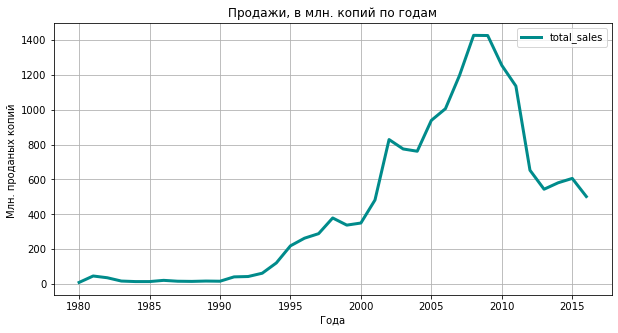

In [12]:
print('График изменений суммарных продаж за весь период имеющихся данных')

(data
    .pivot_table(index=['year_of_release'], values='total_sales', aggfunc='count')
    .plot(kind='line',
             figsize=(10,5),
             title = 'Продажи, в млн. копий по годам',
             xlabel='Года',
             ylabel='Млн. проданых копий ',
             grid=True,
             color='#008B8B',
             linewidth=3
         )
)

plt.show()

**ВЫБОР АКТУАЛЬНОГО ПЕРИОДА**

Анализ  графика показал что с 1980 года наблюдается стремительный рост количества проданных компьютерных игр, с пиком в 2009 году и дальнейшим спадом. 

Очевидно, что данные за весь представленный период использовать некорректно, поскольку с 1980 года ряд платформ уже не актуален и больше не используется, иные - только появились. Ограничимся последними 4-мя годами (2013 - 2016 год)

In [13]:
# оставим только данные за актуальный период
# данные за предыдущие года не учитываются
data_actual = data.query('year_of_release > 2012')

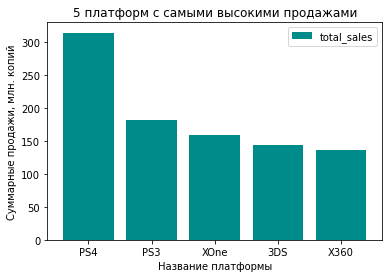

In [14]:
# посмотрим 5 платформ с самыми высокими продажами за рассматриваемое время
ax = (data_actual
    .pivot_table(index=['platform'], 
                    values=['total_sales'],
                    aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
    .head()
    .plot(kind='bar', 
          color='#008B8B',
          xlabel='Название платформы',
          ylabel='Суммарные продажи, млн. копий',
          title='5 платформ с самыми высокими продажами',
          width=0.8)
    )
ax.set_xticklabels(['PS4', 'PS3', 'XOne', '3DS', 'X360'], rotation=0)
plt.show()

За исследуемый актуальный период по суммарным продажам лидируют 5 платформ:
* PlayStation 4
* PlayStation 3
* XBOX One
* Nintendo 3DS
* XBOX 360

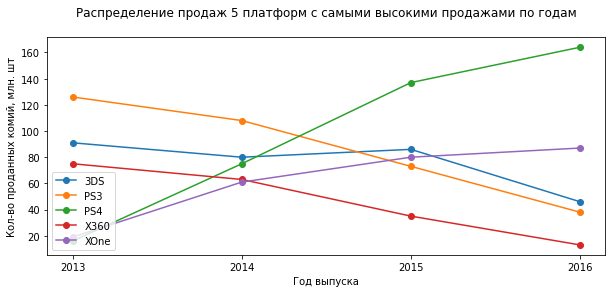

In [15]:
# рассмотрим распределение продаж этих платформ по годам
ax = (data_actual
    .query('platform == "PS4" | platform == "PS3" | platform == "X360" | platform == "3DS" | platform == "XOne"')
    .pivot_table(index='year_of_release',
                 columns='platform',
                 values='total_sales',
                 aggfunc='count')
    .plot(kind='line', figsize=(10,4), style='o-')
)

ax.set_xticks([2013, 2014, 2015, 2016])
plt.xlabel('Год выпуска')
plt.ylabel('Кол-во проданных комий, млн. шт')
plt.title('Распределение продаж 5 платформ с самыми высокими продажами по годам' + "\n")
plt.legend(loc=3)
plt.show()

# Определение перспективных платформ

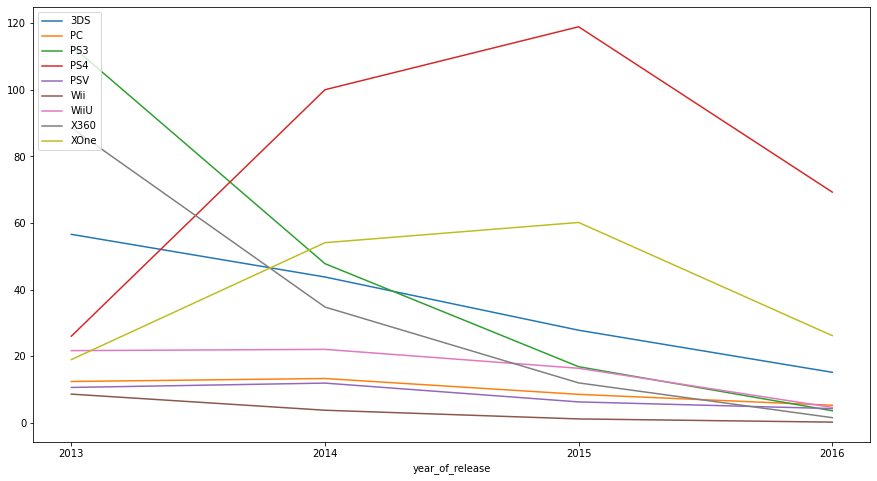

In [17]:
# попробуем собрать один график, на который нанесем все изменения продаж для платформ за 
# актуальный период
ax = (data_actual
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .dropna(axis=1)
    .plot(figsize=(15,8))
)
plt.legend(loc=2)
ax.set_xticks([2013, 2014, 2015, 2016])
plt.show()

На данном графике видно 3 платформы, которые покаывают рост продаж (PS4, XOne и PC). Эти 3 платформы можно назвать перспективными, однако посмотрим на каждую платформу в отдельности, чтобы проследить период за который платформы, в среднем, перестают быть актуальными.

In [67]:
# соберем данные, чтобы посмотреть характерной срок появления и исчезания платформ
platform_sales = (data
    .query('year_of_release >= 2006')
    .pivot_table(index=['platform', 'year_of_release'],
                 values='total_sales', 
                 aggfunc=('sum','count'))
    .reset_index()
                 )
platform_sales.head()

,platform,year_of_release,count,sum
0,3DS,2011.0,116,63.20
1,3DS,2012.0,93,51.36
2,3DS,2013.0,91,56.57
3,3DS,2014.0,80,43.76
4,3DS,2015.0,86,27.78


## **Play Station 2**

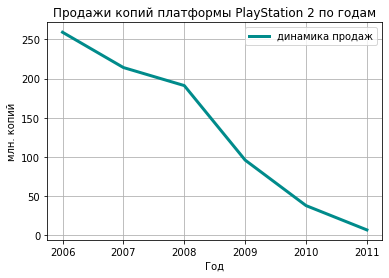

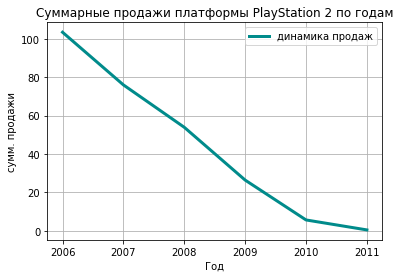

In [51]:
# рассмотрим динамику кол-ва проданных копий для выбранной платформы за выбранный период
ax = (platform_sales
    .query('platform == "PS2"')
    .plot(x='year_of_release', 
          y='count',
          title='Продажи копий платформы PlayStation 2 по годам',
          xlabel='Год',
          ylabel='млн. копий',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True
          )
)
ax.set_xticks([2006, 2007, 2008, 2009, 2010, 2011])
# рассмотрим динамику суммарных продаж для выбранной платформы за выбранный период
ax1 = (platform_sales
    .query('platform == "PS2"')
    .plot(x='year_of_release', 
          y='sum',
          title='Суммарные продажи платформы PlayStation 2 по годам',
          xlabel='Год',
          ylabel='сумм. продажи',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True
          )
)
plt.show()

###### **вывод:**

Рассматривались 2 зависимости - как менялись кол-во проданных копий платформы в зависимости от года, а также - суммарные продажи в зависимости от года.

Для платформы PlayStation 2 оба графика имеют идентичные тенденции - пик продаж, приходящийся на 2006 год и дальнейшее монотонное снижение в продажах. 

Данная игровая платформа является **неперспективной**

## **XBOX 360**

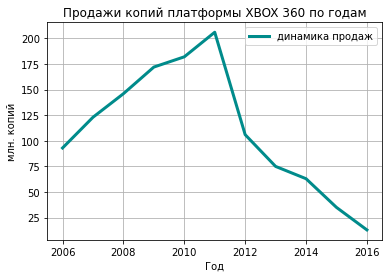

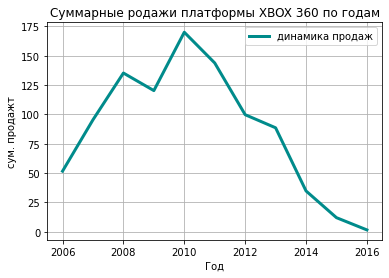

In [52]:
# рассмотрим динамику кол-ва проданных копий для выбранной платформы за выбранный период
(platform_sales
    .query('platform == "X360"')
    .plot(x='year_of_release', 
          y='count',
          title='Продажи копий платформы XBOX 360 по годам',
          xlabel='Год',
          ylabel='млн. копий',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True)
)
# рассмотрим динамику суммарных продаж для выбранной платформы за выбранный период
(platform_sales
    .query('platform == "X360"')
    .plot(x='year_of_release', 
          y='sum',
          title='Суммарные родажи платформы XBOX 360 по годам',
          xlabel='Год',
          ylabel='сум. продажт',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True)
)
plt.show()

**вывод:**

Рассматривались 2 зависимости: как менялись кол-во проданных копий платформы в зависимости от года, а также - суммарные продажи в зависимости от года.

Для платформы XBOX 360 оба графика имеют схожие тенденции тенденции - пик продаж, приходящийся на 2011 год и дальнейшее снижение в продажах. 

Данная игровая платформа является **неперспективной**

## **PlayStation 3**

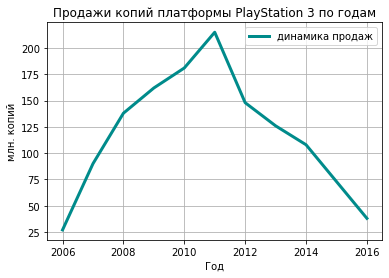

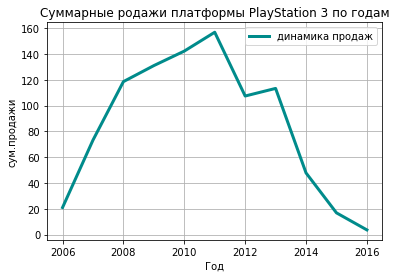

In [53]:
(platform_sales
    .query('platform == "PS3"')
    .plot(x='year_of_release', 
          y='count',
          title='Продажи копий платформы PlayStation 3 по годам',
          xlabel='Год',
          ylabel='млн. копий',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True
          )
)

(platform_sales
    .query('platform == "PS3"')
    .plot(x='year_of_release', 
          y='sum',
          title='Суммарные родажи платформы PlayStation 3 по годам',
          xlabel='Год',
          ylabel='сум.продажи',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True
          )
)
plt.show()

**вывод:**

Рассматривались 2 зависимости: колебание кол-во проданных копий платформы в зависимости от года, а также - колебания суммарных продаж в зависимости от года.

Анализ колебания кол-ва проданных копий имеет единственный пик в 2011 году, и затем - спад.

В случае рассмотрения суммарных продаж заметен второй пик, приходящийся на 2013 год, однако затем следует резкий спад. 

Данная игровая платформа является **неперспективной**

## **Nintendo Wii**

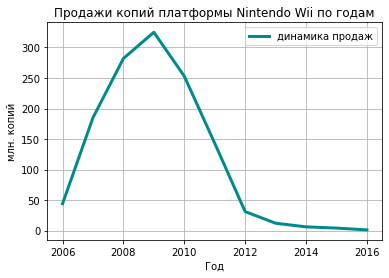

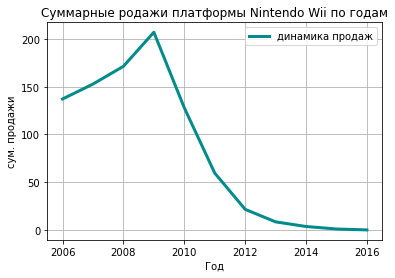

In [55]:
(platform_sales
    .query('platform == "Wii"')
    .plot(x='year_of_release', 
          y='count',
          title='Продажи копий платформы Nintendo Wii по годам',
          xlabel='Год',
          ylabel='млн. копий',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True
          )
)

(platform_sales
    .query('platform == "Wii"')
    .plot(x='year_of_release', 
          y='sum',
          title='Суммарные родажи платформы Nintendo Wii по годам',
          xlabel='Год',
          ylabel='сум. продажи',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True
          )
)
plt.show()

**вывод:**

Рассматривались 2 зависимости: колебание кол-во проданных копий платформы в зависимости от года, а также - колебания суммарных продаж в зависимости от года.

Исходя из графика очевидно что пик популярности Nintendo Wii пришелся на 2009, в дальнейшем мы наблюдаем спад и выход на плато в области 0. 

Данная игровая платформа является **неперспективной**

## **Nintendo DS**

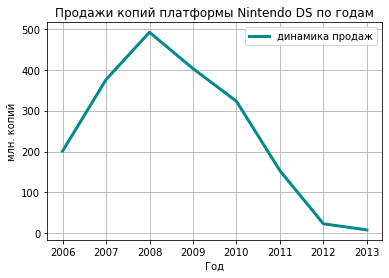

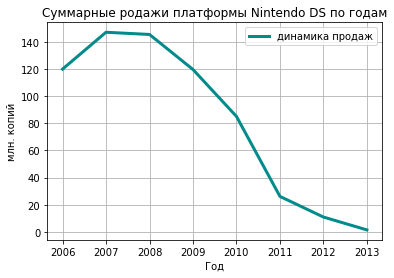

In [56]:
(platform_sales
    .query('platform == "DS" and year_of_release > 2005')
    .plot(x='year_of_release', 
          y='count',
          title='Продажи копий платформы Nintendo DS по годам',
          xlabel='Год',
          ylabel='млн. копий',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True
          )
)

(platform_sales
    .query('platform == "DS" and year_of_release > 2005')
    .plot(x='year_of_release', 
          y='sum',
          title='Суммарные родажи платформы Nintendo DS по годам',
          xlabel='Год',
          ylabel='млн. копий',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True
          )
)
plt.show()

**вывод:**

Рассматривались 2 зависимости: колебание кол-во проданных копий платформы в зависимости от года, а также - колебания суммарных продаж в зависимости от года.

Исходя из графика очевидно что пик суммарных продаж Nintendo DS пришелся на 2008, в дальнейшем мы наблюдаем спад. Более того, исходя из данных статистика продаж заканчивается на 2013 году. Таким образом мы можем сделать вывод что:

Данная игровая платформа является **неперспективной**

## **Nintendo 3DS**

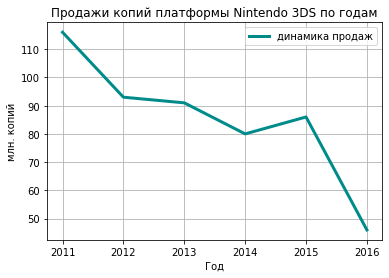

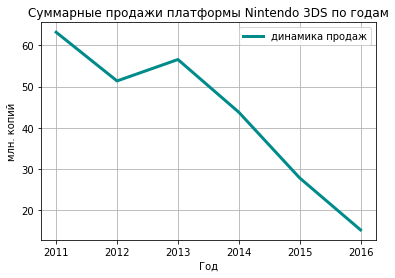

In [57]:
(platform_sales
    .query('platform == "3DS"')
    .plot(x='year_of_release', 
          y='count',
          title='Продажи копий платформы Nintendo 3DS по годам',
          xlabel='Год',
          ylabel='млн. копий',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True
          )
)

(platform_sales
    .query('platform == "3DS"')
    .plot(x='year_of_release', 
          y='sum',
          title='Суммарные продажи платформы Nintendo 3DS по годам',
          xlabel='Год',
          ylabel='млн. копий',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True
          )
)
plt.show()

**вывод:**

Рассматривались 2 зависимости: колебание кол-во проданных копий платформы в зависимости от года, а также - колебания суммарных продаж в зависимости от года.

Исходя из графика очевидно что пик проданных копий Nintendo 3DS пришелся на 2011, в дальнейшем мы наблюдаем спад. В 2015 году наблюдается небольшой подъем, за которым, однако, идет резкий спад. 

Анализ зависимости суммарных продаж имеет более драматичный вид, с небольшим всплеском в 2013 году тенденция суммарных продаж - стремится к нулю.

Данная игровая платформа является **неперспективной**

## **PlayStation Vita**

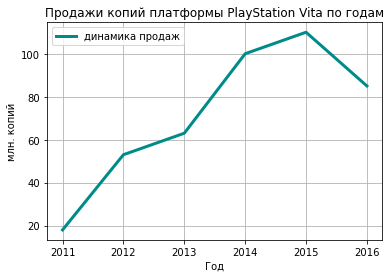

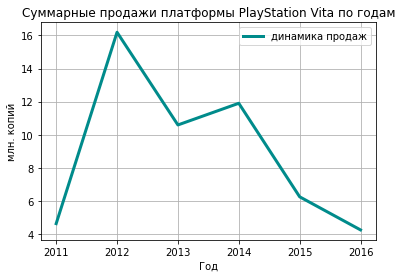

In [58]:
(platform_sales
    .query('platform == "PSV"')
    .plot(x='year_of_release', 
          y='count',
          title='Продажи копий платформы PlayStation Vita по годам',
          xlabel='Год',
          ylabel='млн. копий',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True)
)

(platform_sales
    .query('platform == "PSV"')
    .plot(x='year_of_release', 
          y='sum',
          title='Суммарные продажи платформы PlayStation Vita по годам',
          xlabel='Год',
          ylabel='млн. копий',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True)
)
plt.show()

**вывод:**

Рассматривались 2 зависимости: колебание кол-во проданных копий платформы в зависимости от года, а также - колебания суммарных продаж в зависимости от года.

Для данной игровой платформы зависимости имеют кардинально разные виды. Если рассмотреть график динамики продаж копий в зависимости от года, видно что до 2015 года игровая платформа набирает обороты в продажах. Спад начинается лишь к 2016 году.

Граффик, отражающий колебания суммарных продаж по годам, проказывает более неутешительную картину. Пик продаж платформы приходится на 2012 год, затем происходит постепенное снижение суммарных продаж.


Данная игровая платформа является **неперспективной**

## **PlayStation 4**

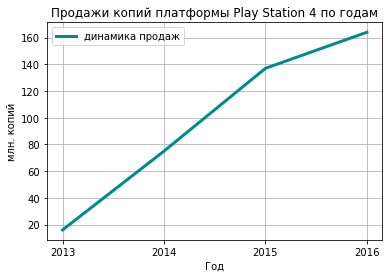

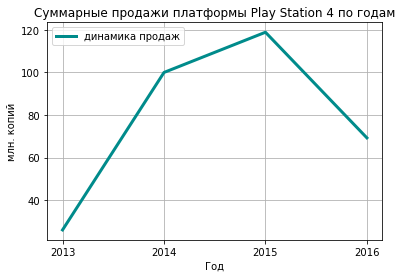

In [59]:
ax = (platform_sales
    .query('platform == "PS4"')
    .plot(x='year_of_release', 
          y='count',
          title='Продажи копий платформы Play Station 4 по годам',
          xlabel='Год',
          ylabel='млн. копий',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True
          )
)
ax.set_xticks([2013, 2014, 2015, 2016])

ax1 = (platform_sales
    .query('platform == "PS4"')
    .plot(x='year_of_release', 
          y='sum',
          title='Суммарные продажи платформы Play Station 4 по годам',
          xlabel='Год',
          ylabel='млн. копий',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True
          )
)
ax1.set_xticks([2013, 2014, 2015, 2016])
plt.show()

**вывод:**

Рассматривались 2 зависимости: колебание кол-во проданных копий платформы в зависимости от года, а также - колебания суммарных продаж в зависимости от года.

Исходя из графика, на котором отражена динамика продаж копий игр по годам, очевидно что пик суммарных продаж PlayStation 4 еще не был достигнут. Однако, если рассмотреть график суммарных продаж данной платформы, будет очевидным факт - что суммарные продажи начали снижаться. Однако, на 2016 год они все еще высоки, что дает нам возможность сделать вывод что:

Данная игровая платформа является **перспективной**

## **Personal Computer**

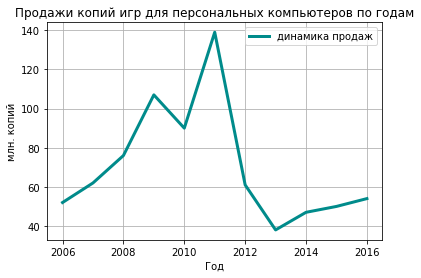

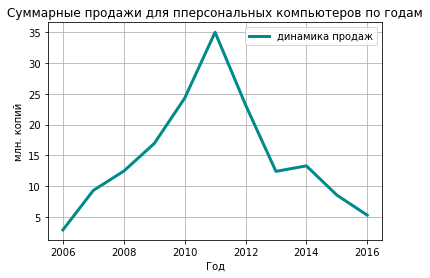

In [60]:
(platform_sales
    .query('platform == "PC"')
    .plot(x='year_of_release', 
          y='count',
          title='Продажи копий игр для персональных компьютеров по годам',
          xlabel='Год',
          ylabel='млн. копий',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True
          )
)

(platform_sales
    .query('platform == "PC"')
    .plot(x='year_of_release', 
          y='sum',
          title='Суммарные продажи для пперсональных компьютеров по годам',
          xlabel='Год',
          ylabel='млн. копий',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True
          )
)
plt.show()

**вывод:**

Рассматривались 2 зависимости: колебание кол-во проданных копий платформы в зависимости от года, а также - колебания суммарных продаж в зависимости от года.

Исходя из графика очевидно что зависимость продаж от времени для компьютеров имеет сложный характер. На всем рассматриваемом промежутке времени видны и спады популярности и подъемы. На данный момент наблюдается легкий рост в продажах копий. Исходя из зависимости суммарных продаж видно, что динамика идет на спад. Однако, на мой взгляд, имеет смысл принять портативные компьютеры как перспективную платформу для игр, поскольку многие пользователи все еще отдают предпочтение ПК, нежели другим платформам. 


Данная игровая платформа является **перспективной**

## **PlayStation Portable**

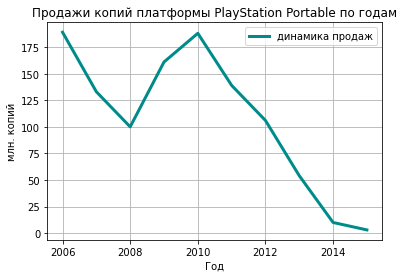

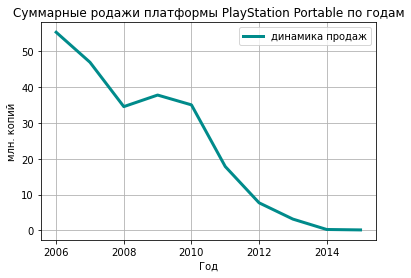

In [61]:
(platform_sales
    .query('platform == "PSP"')
    .plot(x='year_of_release', 
          y='count',
          title='Продажи копий платформы PlayStation Portable по годам',
          xlabel='Год',
          ylabel='млн. копий',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True
          )
)

(platform_sales
    .query('platform == "PSP"')
    .plot(x='year_of_release', 
          y='sum',
          title='Суммарные родажи платформы PlayStation Portable по годам',
          xlabel='Год',
          ylabel='млн. копий',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True
          )
)
plt.show()

**вывод:**

Рассматривались 2 зависимости: колебание кол-во проданных копий платформы в зависимости от года, а также - колебания суммарных продаж в зависимости от года.

Исходя из данных графика видно что пик продаж PSP приходился на 2010 год, в дальнейшем наблюдается спад.

Данная игровая платформа является **неперспективной**

## **XBOX One**

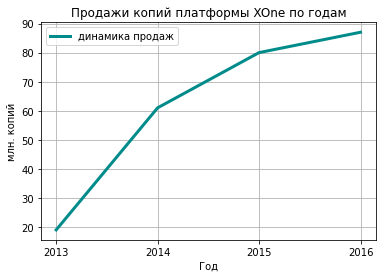

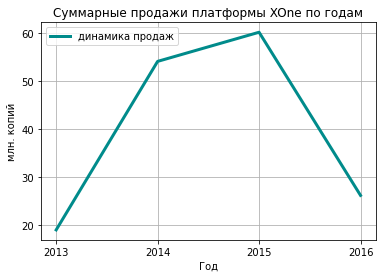

In [62]:
ax = (platform_sales
    .query('platform == "XOne"')
    .plot(x='year_of_release', 
          y='count',
          title='Продажи копий платформы XOne по годам',
          xlabel='Год',
          ylabel='млн. копий',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True
          )
)
ax.set_xticks([2013, 2014, 2015, 2016])

ax1 = (platform_sales
    .query('platform == "XOne"')
    .plot(x='year_of_release', 
          y='sum',
          title='Суммарные продажи платформы XOne по годам',
          xlabel='Год',
          ylabel='млн. копий',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True
          )
)
ax1.set_xticks([2013, 2014, 2015, 2016])
plt.show()

**вывод:**

Рассматривались 2 зависимости: колебание кол-во проданных копий платформы в зависимости от года, а также - колебания суммарных продаж в зависимости от года.

Исходя из графика очевидно что пик проданных копий XBOX One еще не был достигнут. Однако, рассмотрение колебаний суммарных продаж указывает на то что пик был достигнут, и теперь начинается спад. Однако, на 2016 год, в сравнении с другими платформами, суммарные продажи все еще довольно высокие. Все это позволяет нам сделать вывод что:

Данная игровая платформа является **перспективной**

## **Nintendo WiiU**

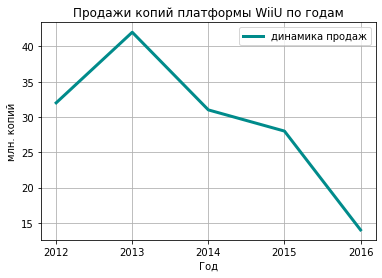

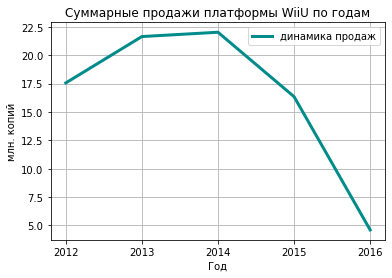

In [63]:
ax = (platform_sales
    .query('platform == "WiiU"')
    .plot(x='year_of_release', 
          y='count',
          title='Продажи копий платформы WiiU по годам',
          xlabel='Год',
          ylabel='млн. копий',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True
          )
)
ax.set_xticks([2012, 2013, 2014, 2015, 2016])

ax1 = (platform_sales
    .query('platform == "WiiU"')
    .plot(x='year_of_release', 
          y='sum',
          title='Суммарные продажи платформы WiiU по годам',
          xlabel='Год',
          ylabel='млн. копий',
          label='динамика продаж',
          color='#008B8B',
          linewidth=3,
          grid=True
          )
)
ax1.set_xticks([2012, 2013, 2014, 2015, 2016])
plt.show()

**вывод:**

Рассматривались 2 зависимости: колебание кол-во проданных копий платформы в зависимости от года, а также - колебания суммарных продаж в зависимости от года.

Исходя из данных видно, что пик продаж Nintendo WiiU пришелся на 2013 год и динамика идет на спад

Данная игровая платформа является **неперспективной**

## **ПРОМЕЖУТОЧНЫЙ ВЫВОД**

Анализ данных показал, что среди 12 платформ, которые мы просмотрели за 10 лет лишь 3 платформы не показывают отрицательную динамику. 

Платформы, которые являются перспективными:
* PlayStation 4
* XBOX One
* Персональные компьютеры

## Диаграмма размаха по глобальным продажам

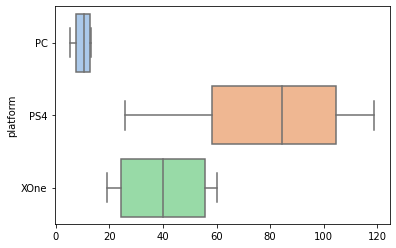

In [31]:
# построим диаграмму размаха для 3х перспективных платформ
boxplot_three = (data_actual
       .query('platform == "PS4"|platform == "PC"|platform == "XOne"') 
       .pivot_table(index='year_of_release',
                       columns='platform',
                       values='total_sales',
                       aggfunc='sum') 
)
sns.boxplot(data=boxplot_three, orient='h', palette = 'pastel')
plt.show()

**ВЫВОД**

Исходя из данных диаграммы разброса для 3х перспективных платформ, самые высокие продажи наблюдаются у PlayStation 4, самые низкие у Персональных Компьютеров.

# Влияние оценок на продажи

## Оценки критиков

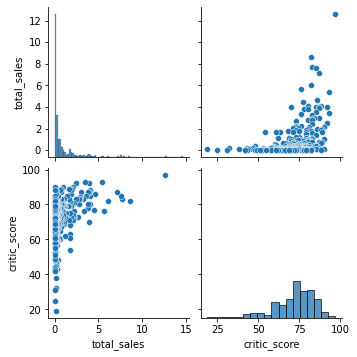

Корреляция между продажами и оценкой критиков ддя PlayStation 4
0.406567902061781


In [72]:
# посмотрим как влияют оценки критиков на продажи для PS4
ps4 = data_actual.query('platform == "PS4"')
sns.pairplot(ps4[['total_sales', 'critic_score']], palette = '#008B8B')

plt.show()

print('Корреляция между продажами и оценкой критиков ддя PlayStation 4')
print(ps4['total_sales'].corr(ps4['critic_score']))

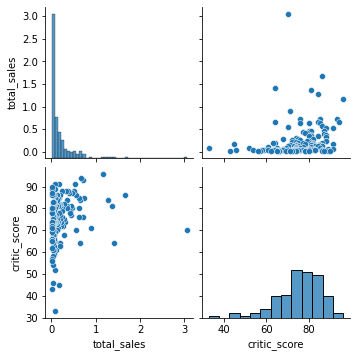

Корреляция между продажами и оценкой критиков ддя Personal Computer
0.19603028294369382


In [34]:
# посмотрим как влияют оценки критиков на продажи для PС
pc = data_actual.query('platform == "PC"')
sns.pairplot(pc[['total_sales', 'critic_score']])

plt.show()

print('Корреляция между продажами и оценкой критиков ддя Personal Computer')
print(pc['total_sales'].corr(pc['critic_score']))

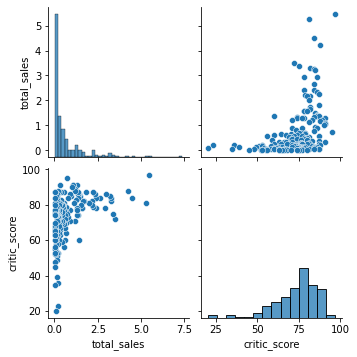

Корреляция между продажами и оценкой критиков ддя XOne
0.41699832800840175


In [66]:
# посмотрим как влияют оценки критиков на продажи для XOne
xone = data_actual.query('platform == "XOne"')
sns.pairplot(xone[['total_sales', 'critic_score']])

plt.show()

print('Корреляция между продажами и оценкой критиков ддя XOne')
print(xone['total_sales'].corr(xone['critic_score']))

**вывод**

Анализ графиков показал что корреляция между оценками критиков и количеством проданных копий незначительная. Самая высокая корреляция между этими параметрами наблюдается у платформы XBOX One = 0.42, для PS4 = 0.4 и для PC = 0.2

## Оценки пользователей

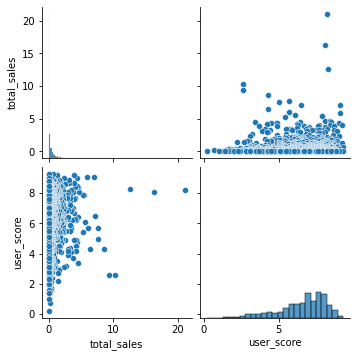

Корреляция между продажами и оценкой пользователей
-0.0026078133545982688


In [36]:
# построим график, чтобы посмотреть какая зависимость между продажами и оценкой пользователя
sns.pairplot(data_actual[['total_sales', 'user_score']])
plt.show()

print('Корреляция между продажами и оценкой пользователей')
print(data_actual['total_sales'].corr(data_actual['user_score']))

**вывод**

Очевидно что оценки зрителей никаким образом не влияют на показатели продаж, поскольку вкус у каждого пользователя свой и предпочтения могут отличаться. Поэтому после покупки игры и ее прохождения пользователь может поставить оценку в зависимости от его персональных субъективных предпочтений.

# Распределение жанров

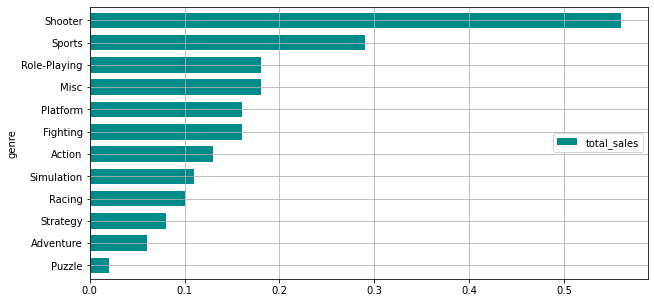

In [37]:
# распределение продаж по жанрам
(data_actual
    .query('platform == "PS4"|platform == "PC"|platform == "XOne"')
    .pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values(by='total_sales')
    .plot(y='total_sales', kind='barh', figsize=(10,5), grid=True, color='#008B8B', width=0.7)
)
plt.legend(loc=7)
#plt.xticks(rotation=15)
plt.show()

**вывод**

Исходя из данных можно сделать вывод, что максимальное медианное количество продаж наблюдается у игра в жанре **Shooter (стрелялка)** и **Sports (спортивные игры)**. Эти два жанра лидируют по продажам. Самые низкие продажи у игр с жанром **Puzzle (головоломки)**.

# Портрет пользователя региона

## Топ 5 платформ по регионам

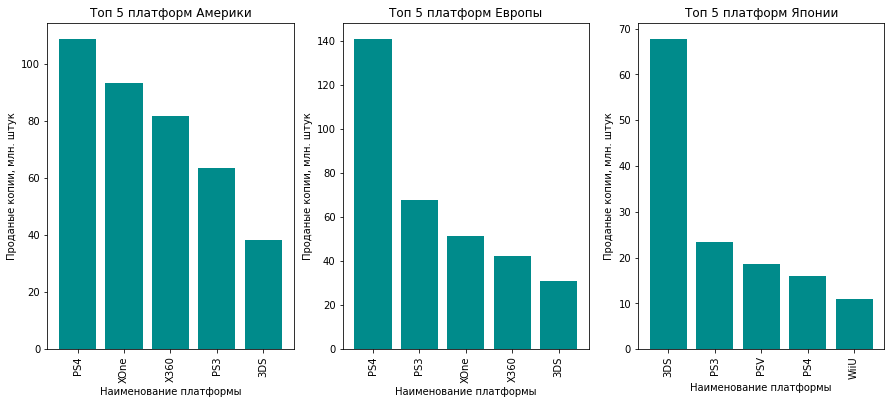

In [38]:
# топ 5 платформ Америки
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
(data_actual
      .groupby('platform')['america_sales']
      .sum()
      .sort_values(ascending=False)
      .head()
      .plot(kind='bar', color='#008B8B', width=0.8)
)
plt.xlabel('Наименование платформы')
plt.ylabel('Проданые копии, млн. штук')
plt.title('Топ 5 платформ Америки')
# топ 5 платформ Европы
plt.subplot(1, 3, 2)
(data_actual
      .groupby('platform')['eu_sales']
      .sum()
      .sort_values(ascending=False)
      .head()
      .plot(kind='bar', color='#008B8B', width=0.8)
)
plt.xlabel('Наименование платформы')
plt.ylabel('Проданые копии, млн. штук')
plt.title('Топ 5 платформ Европы')
# топ 5 платформ Японии
plt.subplot(1, 3, 3)
(data_actual
      .groupby('platform')['japan_sales']
      .sum()
      .sort_values(ascending=False)
      .head()
      .plot(kind='bar', color='#008B8B', width=0.8)
)
plt.xlabel('Наименование платформы')
plt.ylabel('Проданые копии, млн. штук')
plt.title('Топ 5 платформ Японии')

plt.show()

**вывод**

Исходя из представленных диаграмм видно, что предпочтения в платформах отличаются в зависимости от региона.
Для Америки и Европы характерно использование одних и тех же игровых платформ, однако популярность самих платформ в этих двух регионах - разная. Для Японии характерны такие игровые платформы как Nintendo 3DS и PSP -  портативные игровые платформы

(данные за период 2006 - 2016 года)

**ТОП 5 ПЛАТФОРМ АМЕРИКИ**
* XBOX 360
* Nintendo Wii
* PlayStation 3
* Nintendo DS
* PlayStation 4

**ТОП 5 ПЛАТФОРМ ЕВРОПЫ**
* PlayStation 3
* XBOX 360
* Nintendo Wii
* PlayStation 4
* Nintendo DS

**ТОП 5 ПЛАТФОРМ ЯПОНИИ**
* Nintendo DS
* Nintendo 3DS
* PlayStation 3
* PlayStation Portable
* Nintendo Wii

## Распределение жанров по регионам

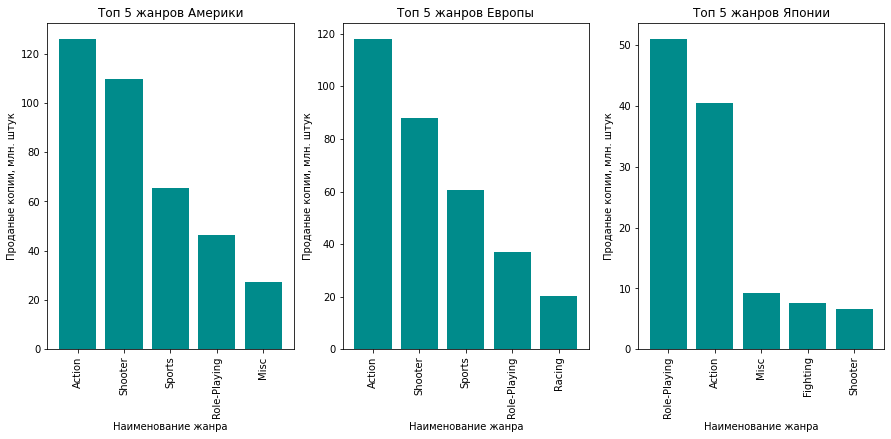

In [39]:
# топ жанров Америки
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
(data_actual
      .groupby('genre')['america_sales']
      .sum()
      .sort_values(ascending=False)
      .head()
      .plot(kind='bar', color='#008B8B', width=0.8)
)
plt.xlabel('Наименование жанра')
plt.ylabel('Проданые копии, млн. штук')
plt.title('Топ 5 жанров Америки')
# топ жанров Европы
plt.subplot(1, 3, 2)
(data_actual
      .groupby('genre')['eu_sales']
      .sum()
      .sort_values(ascending=False)
      .head()
      .plot(kind='bar', color='#008B8B', width=0.8)
)
plt.xlabel('Наименование жанра')
plt.ylabel('Проданые копии, млн. штук')
plt.title('Топ 5 жанров Европы')
# топ жанров Японии
plt.subplot(1, 3, 3)
(data_actual
      .groupby('genre')['japan_sales']
      .sum()
      .sort_values(ascending=False)
      .head()
      .plot(kind='bar', color='#008B8B', width=0.8)
)
plt.xlabel('Наименование жанра')
plt.ylabel('Проданые копии, млн. штук')
plt.title('Топ 5 жанров Японии')

plt.show()

**вывод**

Исоходя из графиков видно, что жанровые предпочтения Америки и Европы практически идентичны, с разницей лишь в том, что в Америке предпочитают жанр Ролевых игр, а в Европе - гонки.

Ситуация в Японии несколько отличается. На первом месте, с большим отрывом - ролевые компьютерные игры. Из повторяющихся жанров с Америкой и Европой - Action, Sports и Misc. Возможно, такая популярность именно ролевых игр в Японии связана с большим количеством Аниме, на основе (и по мотивам) которых и делаются ролевые игры.

**ТОП 5 жанров Америки**
* Action
* Sports
* Shooter
* Misc
* Role-Playing

**ТОП 5 жанров Европы**
* Action
* Sports
* Shooter
* Misc
* Racing

**ТОП 5 жанров Японии**
* Role-Playing
* Action
* Misc
* Sports
* Platform


## Влияние рейтинга ESRB на продажи

In [40]:
data_actual['rating'].unique()

array(['M', 'NaN', 'E', 'T', 'E10+'], dtype=object)

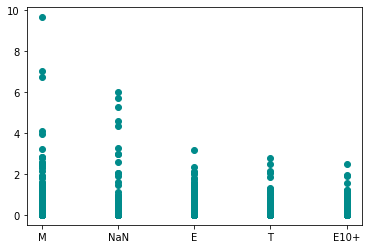

In [41]:
plt.scatter(data_actual['rating'], data_actual['america_sales'], color='#008B8B')
plt.show()

Очевидно что линейной зависимости количества продаж от рейтинга нет, так что разумнее будет посмотреть по средним значениям и построить столбчатую диаграмму.

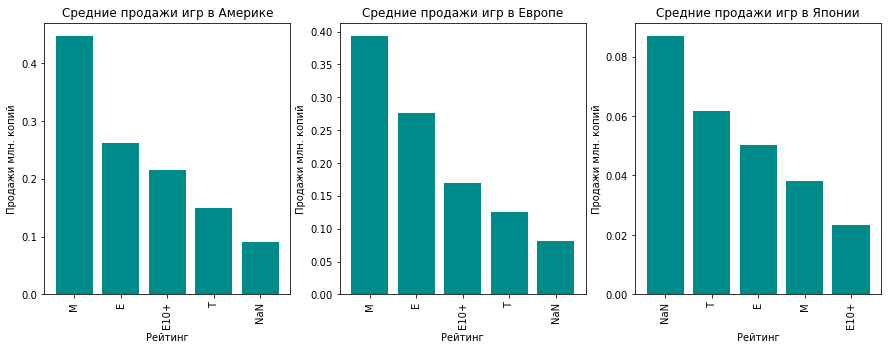

In [42]:
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
(data_actual
    .groupby('rating')['america_sales']
    .mean()
    .sort_values(ascending=False)
    .head() 
    .plot(kind='bar', color='#008B8B', width=0.8)
)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи млн. копий')
plt.title('Средние продажи игр в Америке')

plt.subplot(1, 3, 2)
(data_actual
    .groupby('rating')['eu_sales']
    .mean()
    .sort_values(ascending=False)
    .head() 
    .plot(kind='bar', color='#008B8B', width=0.8)
)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи млн. копий')
plt.title('Средние продажи игр в Европе')

plt.subplot(1, 3, 3)
(data_actual
    .groupby('rating')['japan_sales']
    .mean()
    .sort_values(ascending=False)
    .head() 
    .plot(kind='bar', color='#008B8B', width=0.8)
)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи млн. копий')
plt.title('Средние продажи игр в Японии')
plt.show()

**вывод**

Поскольку между рейтингом и продажами нет линейной зависимости мы можем оценить средние продажи по каждому региону для конкретного рейтинга.

**АМЕРИКА и ЕВРОПА**

Для Америки и Европы распределение популярности продаж игр одинаковое. Самые большие продажи наблюдаются для игр с возрастным рейтингом Mateur 17+. Следом идут игры с рейтингом Everyone и Everyone 10+, на 4м месте - игры с возрастным ограничением Teen и на последнем месте есть группа игр, возрастной рейтинг которых не указан.

**ЯПОНИЯ**
Для Японии самые высокие продажи у игр, возрастной рейтинг которых не указан.
На втором месте игры Teen,следом - игры с возрастным рейтингом Everyone. Игры, с возрастным ограничением Mateur +17 занимают предпоследнее место. И на последнем игры с рейтингом Evwryone 10+.


# **ГИПОТЕЗА №1**
**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

* H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Н1: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [43]:
#data_actual['critic_score'] = data_actual['critic_score'].fillna(8888)
#data_actual['user_score'] = data_actual['user_score'].fillna(8888)

In [44]:
print('Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые')

alpha = 0.05
array1 = data_actual.query('platform == "XOne"')
array2 = data_actual.query('platform == "PC"')

results = st.ttest_ind(array1['user_score'], array2['user_score'], equal_var=False, nan_policy='omit')

print('p-значение ', results.pvalue)
if results.pvalue < alpha:
    print('отвергаем нулевую гипотезу')
else:
    print('нулевая гипотеза не отвергается')
    
print('')


Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
p-значение  0.1475959401343003
нулевая гипотеза не отвергается



**вывод**

Несмотря на то, что данные о пользовательских рейтингах двух платформ различаются, полученное p-value говорит о том что вероятность получить такое или большее различие равно 15%. Это явно слишком большая вероятность для того чтобы делать выводы о значимом различии между рейтингами двух платформ.

# **ГИПОТЕЗА №2**
**Средние пользовательские рейтинги жанров Action  и Sports разные**

* H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
* Н1: Средние пользовательские рейтинги жанров Action и Sports не одинаковые

In [45]:
print('Средние пользовательские рейтинги жанров Action и Sports одинаковые')

alpha = 0.05
array1 = data_actual.query('genre == "Action"')
array2 = data_actual.query('genre == "Sports"')
results = st.ttest_ind(array1['user_score'], array2['user_score'], equal_var=False, nan_policy='omit')
# использую equal_var поскольку выборки разные по размеру 
print('p-значение ', results.pvalue)
if results.pvalue < alpha:
    print('отвергаем нулевую гипотезу')
else:
    print('нулевая гипотеза не отвергается')
    
print('')

Средние пользовательские рейтинги жанров Action и Sports одинаковые
p-значение  1.446003970070351e-20
отвергаем нулевую гипотезу



**вывод**

Полученное p-value значительно меньше порогового значения, таким образом есть основания для того чтобы отбросить нулевую гипотезу.

<div class="alert alert-success">
<b class="alert-heading"> Комментарий ревьюера: ОК</b>

Статистический тест выполнен верно. Только p-value меньше порогового, а не статистически значимой величины :) Статистика используется в науке, поэтому требует точных формулировок.

</div>

# ЗАКЛЮЧЕНИЕ

* Актуальный период, который я рассматриваю 2013 - 2016 года. 
* Характерным сроком возникновения и спада платформ является 10лет.
* Потенциально перспективными платформами были выбраны **PlayStation4**, **XOne** и **PC**, их графики на 2016год хоть и показывают динамику спада, имеют довольно высокие продажи. В случае с **ПК** несмотря на довольно сложный характер зависимости суммарных продаж, все еще довольно много людей имеют у себя дома данную игровую платформу, а значит и играют на ней.
* Наибольшая медианная выручка из 3х рассматриваемых платформ - у PlayStation 4, наименьшая - у персональных компьютеров.
* Влияние рейтинга критиков было рассмотренно отдельно для каждой платформы. Зависимоть наблюдалась незначительная. Самая большая корреляция у XOne = 0.45, PS4=0.4, PC=0.2.
* Влияние оценки пользователей было рассмотренно для всех трех платформ, корреляции нет. Это, по-видимому, происходит из-за того, что оценки пользователей - полностью субъективная вещь и может не зависеть от успешности самой игры, или от того, что оценки пользователей выставляются после прохождения игры, то есть после пика продаж игры.
* Максимальное количество продаж наблюдается у игр в жанре **Shooter (стрелялка)** и **Spotrs(спортивные игры)**. Эти два жанра лидируют по продажам. Самые низкие продажи у игр с жанром **Puzzle(головоломка)**.

**портрет пользователей**

**ТОП 5 ПЛАТФОРМ АМЕРИКИ**
* XBOX 360
* Nintendo Wii
* PlayStation 3
* Nintendo DS
* PlayStation 4

**ТОП 5 ПЛАТФОРМ ЕВРОПЫ**
* PlayStation 3
* XBOX 360
* Nintendo Wii
* PlayStation 4
* Nintendo DS

**ТОП 5 ПЛАТФОРМ ЯПОНИИ**
* Nintendo DS
* Nintendo 3DS
* PlayStation 3
* PlayStation Portable
* Nintendo Wii

**ЖАНРЫ**

**ТОП 5 жанров Америки**
* Action
* Sports
* Shooter
* Misc
* Role-Playing

**ТОП 5 жанров Европы**
* Action
* Sports
* Shooter
* Misc
* Racing

**ТОП 5 жанров Японии**
* Role-Playing
* Action
* Misc
* Sports
* Platform

**Рейтинги в регионах**

**АМЕРИКА и ЕВРОПА**

Для Америки и Европы распределение популярности продаж игр одинаковое. Самые большие продажи наблюдаются для игр с возрастным рейтингом Mateur 17+. Следом идут игры с рейтингом Everyone и Everyone 10+, на 4м месте - игры с возрастным ограничением Teen и на последнем месте есть группа игр, возрастной рейтинг которых не указан.

**ЯПОНИЯ**

Для Японии самые высокие продажи у игр, возрастной рейтинг которых не указан.
На втором месте игры Teen,следом - игры с возрастным рейтингом Everyone. Игры, с возрастным ограничением Mateur +17 занимают предпоследнее место. И на последнем игры с рейтингом Evwryone 10+.

**ГИПОТЕЗА 1**
* проверка двухсторонней гипотезы, alpha 5%
* H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Н1: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

Несмотря на то, что данные о пользовательских рейтингах двух платформ различаются, полученное p-value говорит о том что вероятность получить такое или большее различие равно 15%. Это явно слишком большая вероятность для того чтобы делать выводы о значимом различии между рейтингами двух платформ.

**ГИПОТЕЗА 2**
* проверка двухсторонней гипотезы, alpha 5%
* H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
* Н1: Средние пользовательские рейтинги жанров Action и Sports не одинаковые

Полученное p-value значительно меньше пороговой, таким образом есть основания для того чтобы отбросить нулевую гипотезу.